In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 100

# Trovare $\tau$

In [3]:
Dd = "0.95"
function = "flat"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [4]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [5]:
#funzione Dd
data1 = "./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt"
data1 = np.loadtxt(data1).T
#spikesim
s1 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data1[0]))

In [6]:
tau1, tau3 = s1.threshold(pop=subnets, res=1., N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 100	noverlap=20


In [7]:
Dd = "0.85"
function = "flat"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [8]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [9]:
#funzione Dd
data2 = "./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt"
data2 = np.loadtxt(data2).T
#spikesim
s2 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data2[0]))

In [10]:
tau2, tau4 = s2.threshold(pop=subnets, res=1., N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 100	noverlap=20


In [11]:
#s.info()

#s2.histogram('all', res = 10., dd_par= sigm_par, save_img = periodogram_path + "/activity" + new_function + ".png")

In [12]:
#dopamine depletion periodogram
#s2.periodogramdd(pop=subnets, data=data1, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

In [13]:
#s2.threshold_imgs(pop=subnets, res=1., N_parseg=parseg), save_img = *)

In [14]:
print(tau1)
print(tau2)
print(tau3)
print(tau4)

0.4806655799824246
0.034000248882602134
0.3121000545197436
0.023891082624061886


In [15]:
tau = (tau1 + tau2)/2
print(tau)

0.2573329144325134


In [16]:
tau_mean = (tau3 + tau4)/2
print(tau_mean)

0.16799556857190273


### flat 0.85

nparseg = 100	noverlap=20
frequenza del massimo: 18.8
valore del massimo: 18.525078537615382


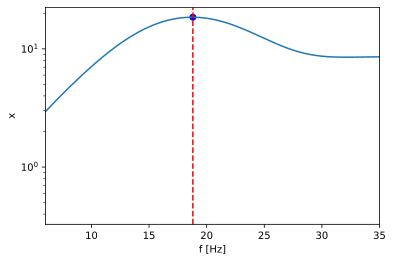

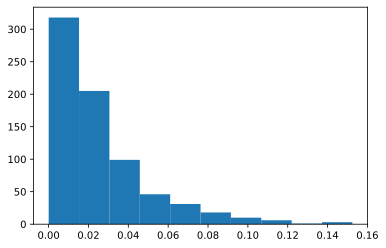

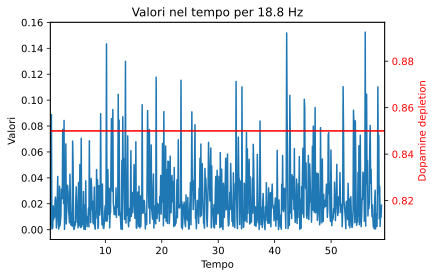

In [17]:
output=s2.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data = data2

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[np.argmax(sum1)]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[np.argmax(sum1), :]


plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index>=tau], Sxx_max_index[Sxx_max_index>=tau], '+r')
ax1.plot(t, Sxx_max_index)
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.title(f'Valori nel tempo per {f[max_index]:.1f} Hz')

data[0] = data[0]/1000
data[1] = data[1]/1.083
ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

5.2345945676892526e-08


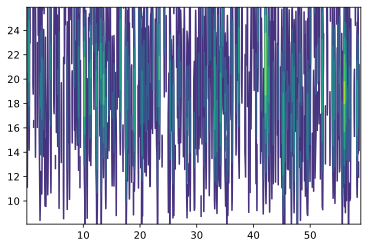

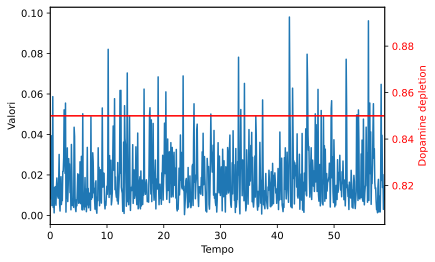

In [18]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
print(np.min(Sxx_lim))
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)
ax1.plot(t[pow_t>=tau_mean], pow_t[pow_t>=tau_mean], '+r')
ax1.plot(t, pow_t)
plt.xlabel('Tempo')
plt.ylabel('Valori')

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

In [19]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

In [20]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

### flat 0.95

nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 278.8518492232018


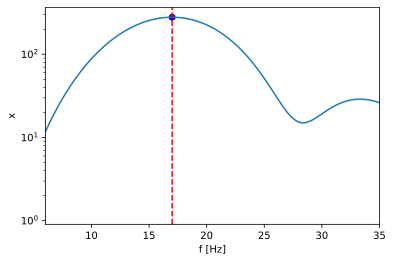

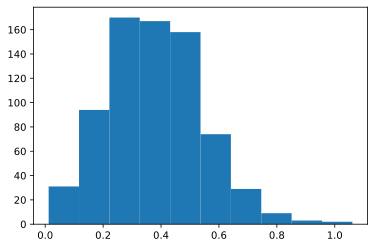

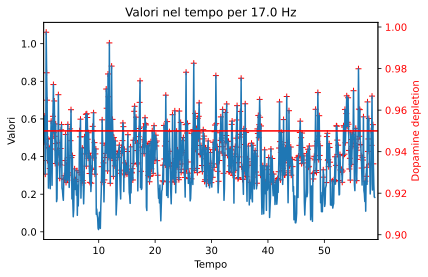

In [21]:
output=s1.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data = data1

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[np.argmax(sum1)]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[np.argmax(sum1), :]


plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index>=tau], Sxx_max_index[Sxx_max_index>=tau], '+r')
ax1.plot(t, Sxx_max_index)
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.title(f'Valori nel tempo per {f[max_index]:.1f} Hz')

data[0] = data[0]/1000
data[1] = data[1]/1.083
ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

5.000963726441563e-06


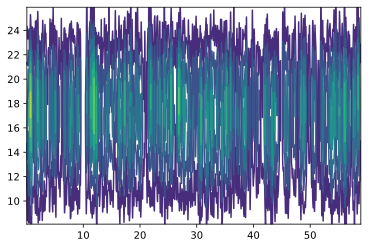

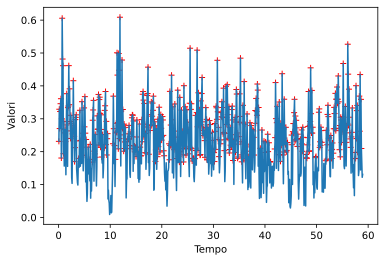

In [22]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
print(np.min(Sxx_lim))
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)
ax1.plot(t[pow_t>=tau_mean], pow_t[pow_t>=tau_mean], '+r')
ax1.plot(t, pow_t)
plt.xlabel('Tempo')
plt.ylabel('Valori')

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

In [23]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [119, 125, 289, 13, 5, 17, 108], 96.57142857142857)

In [24]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(11, [43, 59, 119, 247, 22, 13, 5, 17, 8, 64, 20], 56.09090909090909)

# SIGMOID9

In [25]:
#tau trovato sopra trascritto in modo da evitare calcoli
#tau = 0.025213876257391108
#tau_mean = 0.16799556857190273

In [26]:
Dd = "0.95"
function = "sigmoid9"
subnets = "STN"
sigm_par = 0.00005

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [27]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [28]:
#funzione Dd
data3 = "./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt"
data3 = np.loadtxt(data3).T
#spikesim
s3 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data3[0]))

In [29]:
#dopamine depletion periodogram
#s3.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 16.900000000000002
valore del massimo: 1061.596425270104


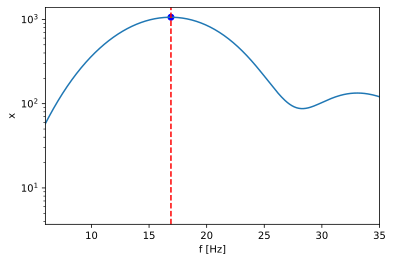

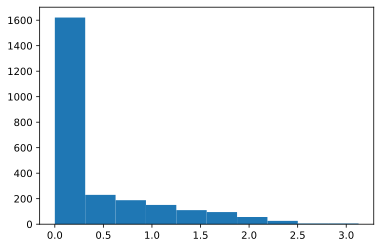

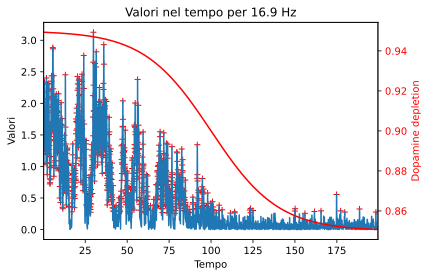

In [30]:
output=s3.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data = data3

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[np.argmax(sum1)]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[np.argmax(sum1), :]


plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index>=tau], Sxx_max_index[Sxx_max_index>=tau], '+r')
ax1.plot(t, Sxx_max_index)
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.title(f'Valori nel tempo per {f[max_index]:.1f} Hz')

data[0] = data[0]/1000
data[1] = data[1]/1.083
ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

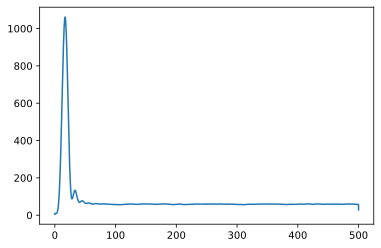

In [31]:
plt.plot(f,sum1)
plt.show()

6.294682511068051e-08


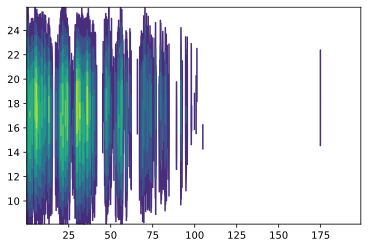

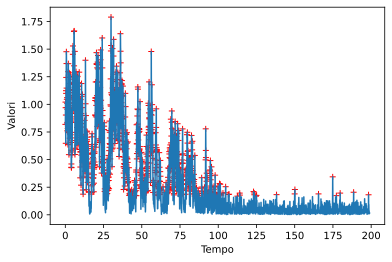

In [32]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
print(np.min(Sxx_lim))
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)
ax1.plot(t[pow_t>=tau_mean], pow_t[pow_t>=tau_mean], '+r')
ax1.plot(t, pow_t)
plt.xlabel('Tempo')
plt.ylabel('Valori')

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

In [33]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(13, [195, 111, 185, 74, 64, 21, 18, 112, 13, 77, 14, 7, 9], 69.23076923076923)

In [34]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(12, [195, 111, 185, 74, 64, 21, 18, 112, 13, 77, 15, 8], 74.41666666666667)

# SIGMOID10

In [35]:
#tau trovato sopra trascritto in modo da evitare calcoli
#tau = 0.025213876257391108
#tau_mean = 0.16799556857190273

In [36]:
Dd = "0.95"
function = "sigmoid10"
subnets = "STN"
sigm_par = 0.00006

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [37]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [38]:
#funzione Dd
data4 = "./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt"
data4 = np.loadtxt(data4).T
#spikesim
s4 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data3[0]))

In [39]:
#dopamine depletion periodogram
#s3.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

In [40]:
print(data)

[[  1.2464       1.2465       1.2466     ... 200.         200.
  200.        ]
 [  0.94928901   0.94928901   0.94928901 ...   0.85066944   0.85066944
    0.85066944]]


nparseg = 100	noverlap=20
frequenza del massimo: 16.900000000000002
valore del massimo: 566.1327677331691


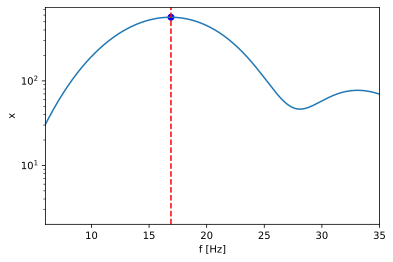

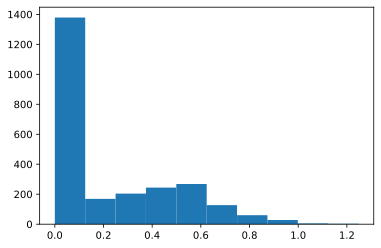

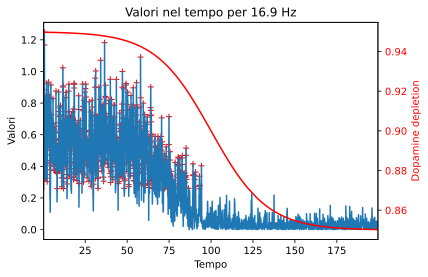

In [41]:
output=s4.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data = data4
data[0] = data[0]/1000
data[1] = data[1]/1.083

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[np.argmax(sum1)]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[np.argmax(sum1), :]


plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index>=tau], Sxx_max_index[Sxx_max_index>=tau], '+r')
ax1.plot(t, Sxx_max_index)
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.title(f'Valori nel tempo per {f[max_index]:.1f} Hz')


ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

7.167964216335737e-09


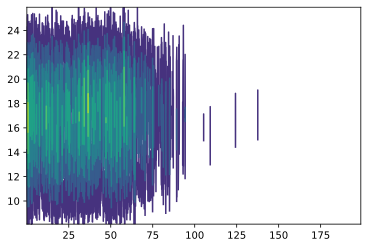

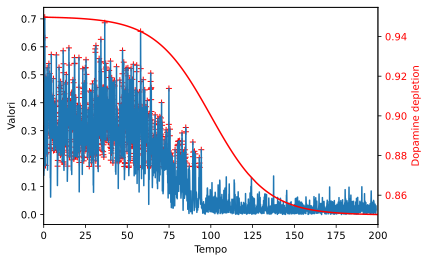

In [56]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
print(np.min(Sxx_lim))
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)
ax1.plot(t[pow_t>=tau_mean], pow_t[pow_t>=tau_mean], '+r')
ax1.plot(t, pow_t)
plt.xlabel('Tempo')
plt.ylabel('Valori')

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

In [43]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(6, [46, 832, 68, 14, 5, 10], 162.5)

In [44]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [46, 316, 409, 95, 57, 14, 6], 134.71428571428572)